<a href="https://colab.research.google.com/github/shelfertmurphy/FromScratchML/blob/main/GradientDescentFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we explore gradient descent from scratch to find the minimum of two functions that have multiple local minima. The gradient descent involves taking repeated steps in the opposite direction of the gradient (all partial derivatives of a function) until an optimal minimum value is found. 


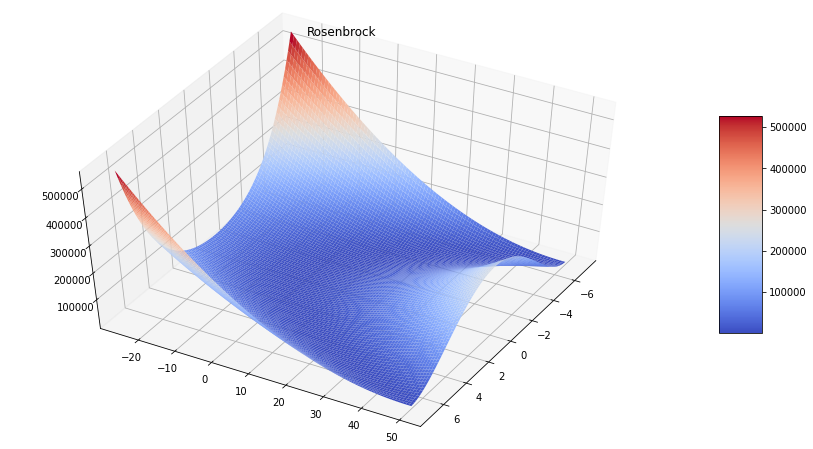

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

#function for the rosenbrock function, takes a matrix where the first row(?) is the x input and the second is the y input
#then we break up the rows into x and y, and plug those values into the function and return that result
a_star = 2
b_star = 100
def rosenbrock(X, a=a_star, b=b_star):
  x, y = X
  return (a-x)**2 + b * (y - x**2)**2

#gradient of rosenbrock, the first component is the derivative with respect to x, second is derivative with respect to y
#we want to minimize this
def rosenbrock_grad(X, a=a_star, b=b_star):
    x, y = X
    return np.array([
        -2 * (x - a) - 4 * b * x * (y - x**2),
        2 * b * (y - x**2)
    ])

#hessian matrix for the rosenbrock function, row1: fxx, fxy, row2: fyx, fyy
#second derivaties
def rosenbrock_hess(X, a=a_star, b=b_star):
    x, y = X
    return np.matrix([
        [2 - 4 * b * (y - 3 * x**2), -4 * b * x],
        [-4 * b * x, 2 * b]
    ])

x = np.linspace(-7,7,100)
y = np.linspace(-25,50, 100)
X, Y = np.meshgrid(x,y)
#to plot function
Z = RB((X,Y))

#defines figure
fig = plt.figure(figsize=(15, 8))
#sets 3d axes
ax = plt.axes(projection='3d')
#title
ax.set_title('Rosenbrock')
#angle?
ax.view_init(elev=50., azim=30)
#colors, etc
s = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm, edgecolor='none')
fig.colorbar(s, shrink=0.5, aspect=5)


In [ ]:
#grad desc function, takes J_grad, initial value for x, learning rate, epsilon, and max iters
#initializes x (matrix containing x and y inputs)
#stores the values of x in an array called x_store
#loops through max iters
#for each i, take a step -alpha*jgrad, jgrad is slope of tangent line at x
#add this new value of x to x_store
#if the norm of the gradient at x is less than epsilon, then we return x, i+1, and the matrix x_store
#else, we return x, max_iters, and x_store
def gradient_descent(J_grad, x_init, alpha=0.001, epsilon=1e-6, max_iterations=10000):
    x = x_init
    x_store = np.array([x])
    for i in range(max_iterations):
        x = x - alpha * J_grad(x)
        x_store=np.append(x_store,np.array([x]), axis=0)
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1, x_store
    return x, max_iterations, x_store

# set our first inputs for x and y to zero (starting point)
#use gradient descent function and input the rosenbrock gradient, initial values for x, alpha and max iters
#this returns the argmin, the iterations we needed, and the matrix of x values at each step
#x* is the min value of x and y we plug int
#rosenbrock(x*) is the actual min
#grad rosenbrock is the values of the grad we get out when we plug in x
x_init = np.zeros(2)
x_min, it_GD,x_store_GD = gradient_descent(rosenbrock_grad, x_init, alpha=0.001, max_iterations=5000)
print('x* =', x_min)
print('Rosenbrock(x*) =', rosenbrock(x_min) )
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it_GD)

x* = [-1.57319635  2.23333758]
Rosenbrock(x*) = 18.60523175605835
Grad Rosenbrock(x*) = [-144.89307953  -48.32183599]
Iterations = 5000


We define the gradient descent method with optimal learning rate  𝛼  at every iteration. Since at every step, the update is:

𝐱𝑡=𝐱𝑡−1−𝛼∇𝑓(𝐱𝑡−1) .

The chosen  𝛼  is going to minimize as much as possible the target function  𝑓 . Therefore, we want  𝛼  to be such that:

𝛼𝑡=𝑎𝑟𝑔𝑚𝑖𝑛𝛼𝑓(𝐱𝑡−𝛼∇𝑓(𝐱𝑡)) 

Since at iteration  𝑡 ,  𝐱𝑡  and  ∇𝑓(𝐱𝑡)  are constants, we can define  𝑞(𝛼) :

𝑞(𝛼)=𝑓(𝐱𝑡−𝛼∇𝑓(𝐱𝑡)) 

that is a function of one variable,  𝛼 . Therefore, we want to find the right  𝛼  that will minimize  𝑞 . Since we know that  𝛼  is bounded, we can use line searching algorithm more suited for this task: Golden Section Search (or bisection method).


In [ ]:
#now try grad des with optimal step size
# Golden Section search to minimize q(alpha)
#function takes f(function), a(first left bound), b(first right bound), and tolerance(when to stop bc the values are so close)
#phi is golden ratio
#d is the new upper bound
#c is new upper bound
# while the distance between d and c is greater than our tolerance,
#if f(d)<f(c), set b to be c
#else, set a to be d
#recalculate d and c, and once we are within the tolerance
#then the arg min should be the two bounds divided by 2? that is what we return
def gss(f, a, b, tol=1e-7): 
    phi = (np.sqrt(5) + 1) / 2
    d = b - (b - a) / phi
    c = a + (b - a) / phi

    while abs(d - c) > tol:
        if f(d) < f(c):
            b = c
        else:
            a = d

        d = b - (b - a) / phi
        c = a + (b - a) / phi

    return (a + b) / 2

# Gradient descent with optimal learning rate, same but we just apply gss to find alpha
def gradient_descent_optimal(J, J_grad, x_init, epsilon=1e-6, max_iterations=5000):
    x = x_init
    x_store = np.array([x])
    for i in range(max_iterations):
      # Define "lambda" functions, which are also known as inline or anonymous functions
        q = lambda alpha: J(x - alpha * J_grad(x))
        alpha = gss(q, 0, 1)
        x = x - alpha * J_grad(x)
        x_store=np.append(x_store,np.array([x]), axis=0)
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1, x_store
    return x, max_iterations, x_store

# Test Rosenbrock with optimal step
#The Rosenbrock function takes 2 inputs (gradient descent with optimal time step)
x_init = np.zeros(2)
x_min, it_GD_opt, x_store_GD_opt = gradient_descent_optimal(rosenbrock, rosenbrock_grad, x_init, epsilon=1e-6,max_iterations=5000)
print('x* =', x_min)
print('Rosenbrock(x*) =', rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it_GD_opt)

x* = [-3.32463074e-03  5.86962952e-07]
Rosenbrock(x*) = 4.0133095870949305
Grad Rosenbrock(x*) = [ 4.00663534e+00 -2.09324132e-03]
Iterations = 5000


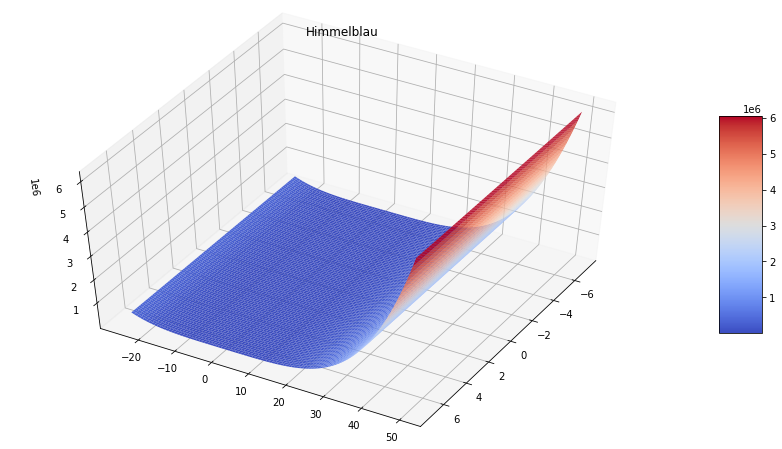

In [ ]:
#now, define functions for Himmelblau
def Himmelblau(X):
  x, y = X
  return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

#Himmelblau gradient
def Himmelblau_grad(X):
  x, y = X
  return np.array([
        (4 * x**3) + (4 * x * y) - (42 * x) + (2 * y**2) - 14,
        (4 * y**3) + (4 * x * y) - (26 * y) + (2 * x**2) - 22
  ])

#plot Himmelblau
x = np.linspace(-7,7,100)
y = np.linspace(-25,50, 100)
X, Y = np.meshgrid(x,y)
#to plot function
Z = Himmelblau((X,Y))

#defines figure
fig = plt.figure(figsize=(15, 8))
#sets 3d axes
ax = plt.axes(projection='3d')
#title
ax.set_title('Himmelblau')
#angle?
ax.view_init(elev=50., azim=30)
#colors, etc
s = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm, edgecolor='none')
fig.colorbar(s, shrink=0.5, aspect=5)

In [ ]:
#test Himmelblau with constant step size
x_init = np.zeros(2)
x_min, it_GD,x_store_GD = gradient_descent(Himmelblau_grad, x_init, alpha=0.001, max_iterations=5000)
print('x* =', x_min)
print('Himmelblau(x*) =', Himmelblau(x_min) )
print('Grad Himmelblau(x*) =', Himmelblau_grad(x_min))
print('Iterations =', it_GD)

In [ ]:
#test Himmelblau with gss
x_init = np.zeros(2)
x_min, it_GD_opt, x_store_GD_opt = gradient_descent_optimal(Himmelblau, Himmelblau_grad, x_init, epsilon=1e-6,max_iterations=5000)
print('x* =', x_min)
print('Himmelblau(x*) =', Himmelblau(x_min))
print('Grad Himmelblau(x*) =', Himmelblau_grad(x_min))
print('Iterations =', it_GD_opt)

x* = [2.99999999 2.00000001]
Himmelblau(x*) = 2.692222671988603e-15
Grad Himmelblau(x*) = [-3.57020738e-07  2.27100713e-07]
Iterations = 23
